In [1]:
 import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
dt=pd.read_csv("training.1600000.processed.noemoticon.csv",sep=',', encoding='latin-1'
               ,header=None,usecols=[0,2,4,5]
              ,names=['class','date','name','avis'])
dt.head(10)

,class,date,name,avis
0,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew
6,0,Mon Apr 06 22:20:03 PDT 2009,mybirch,Need a hug
7,0,Mon Apr 06 22:20:03 PDT 2009,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,Mon Apr 06 22:20:05 PDT 2009,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,Mon Apr 06 22:20:09 PDT 2009,mimismo,@twittera que me muera ?


,valeures manquantes
class,0.0
date,0.0
name,0.0
avis,0.0


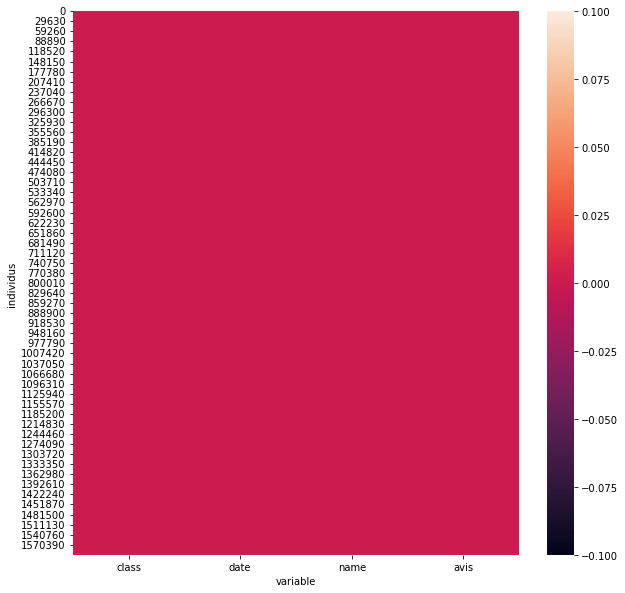

In [3]:
#affichage et valeures manquantes ##
import seaborn as sns 

plt.figure(figsize=(10,10))
sns.heatmap(dt.isna())
plt.xlabel("variable")
plt.ylabel('individus')

val_nan=dt.isna().sum()/dt.shape[0]
val_nan_dt=pd.DataFrame({"valeures manquantes":val_nan})
val_nan_dt

In [4]:
#nInfO ##
print(dt.info())
print("")
print(dt.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   class   1600000 non-null  int64 
 1   date    1600000 non-null  object
 2   name    1600000 non-null  object
 3   avis    1600000 non-null  object
dtypes: int64(1), object(3)
memory usage: 48.8+ MB
None

(1600000, 4)


0    800000
4    800000
Name: class, dtype: int64


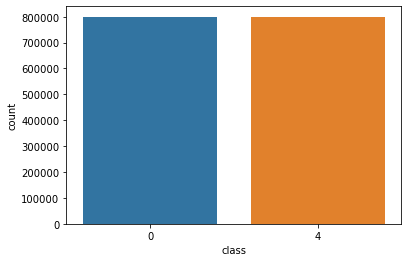

In [5]:
import warnings
warnings.filterwarnings('ignore')

for col in dt.select_dtypes('int'):
    sns.countplot(col,data=dt)
    
print(dt['class'].value_counts())

In [6]:
#echantillonage
from sklearn.utils import shuffle
dt_2=shuffle(dt) 
dt_2.head(5)

ech_dt=dt_2.sample(n=500000,random_state=1) 


In [7]:
########### preprocessing ###################

import nltk 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re 
from sklearn.model_selection import train_test_split
mot_vide=stopwords.words('english')
stemmer=PorterStemmer()

ech_dt['processedavis'] = ech_dt['avis'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub(r"[^a-zA-Z]", " ", x).split() if i not in mot_vide]).lower())
print(ech_dt['processedavis'][:4])

x=ech_dt['processedavis']
y=ech_dt['class']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=1)
print("train set =>",xtrain.shape)
print("test set =>",xtest.shape)

1161387                                 jcarpt hai jane what
800820     bodi ach rest mind freakin alert brain absorb ...
1480775                 stone templ pilot clean medicin soul
688347     andreaszymni hatt ich fr auch identi ca suppor...
Name: processedavis, dtype: object
train set => (400000,)
test set => (100000,)


In [8]:
########### vectorization ############
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize=TfidfVectorizer()
xtrain_vect=vectorize.fit_transform(xtrain.values.astype('U'))
xtest_vect=vectorize.fit_transform(xtest.values.astype('U'))
print(vectorize.get_feature_names()[:20])
print(xtrain_vect.shape)
print(xtest_vect.shape)

['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaag', 'aaaaaaaaaaaaaaaahhhhhhhhhhhhhhh', 'aaaaaaaaaaaaahhhhhhhhhhhhhhhhhh', 'aaaaaaaaaaaaalllllllllllllllllllll', 'aaaaaaaaaaaaarrrrgggghhhh', 'aaaaaaaaaaaah', 'aaaaaaaaaaahhhhhhhhhhhhhhh', 'aaaaaaaaaaawwwwwwwwwwwwweeeeeeeeeee', 'aaaaaaaaaah', 'aaaaaaaaag', 'aaaaaaaaahhhhhh']
(400000, 209333)
(100000, 78220)


Naive_bayes

classification rapport : 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76     50021
           4       0.77      0.71      0.74     49979

    accuracy                           0.75    100000
   macro avg       0.75      0.75      0.75    100000
weighted avg       0.75      0.75      0.75    100000



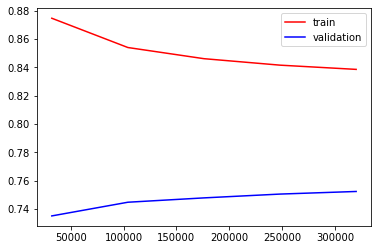

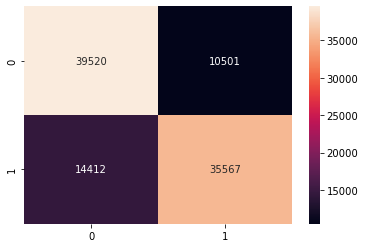

LogisticRegression

classification rapport : 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77     50021
           4       0.76      0.79      0.78     49979

    accuracy                           0.77    100000
   macro avg       0.78      0.77      0.77    100000
weighted avg       0.78      0.77      0.77    100000



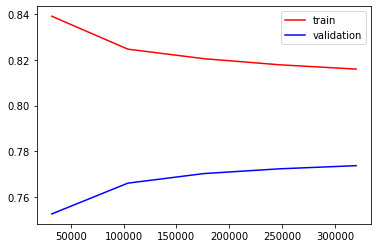

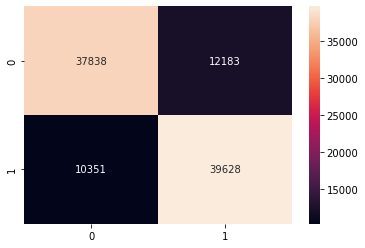

svm

classification rapport : 
               precision    recall  f1-score   support

           0       0.77      0.76      0.76     50021
           4       0.76      0.77      0.77     49979

    accuracy                           0.77    100000
   macro avg       0.77      0.77      0.77    100000
weighted avg       0.77      0.77      0.77    100000



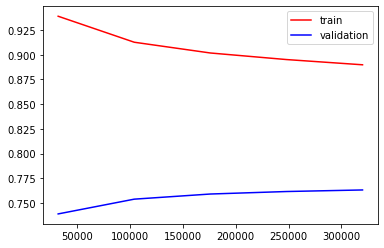

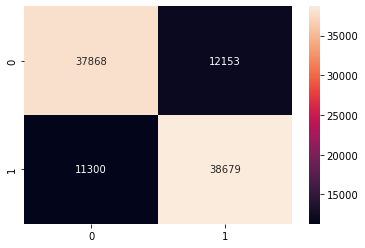

SGDClassifier

classification rapport : 
               precision    recall  f1-score   support

           0       0.79      0.71      0.75     50021
           4       0.74      0.81      0.77     49979

    accuracy                           0.76    100000
   macro avg       0.76      0.76      0.76    100000
weighted avg       0.76      0.76      0.76    100000



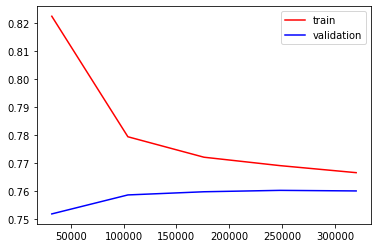

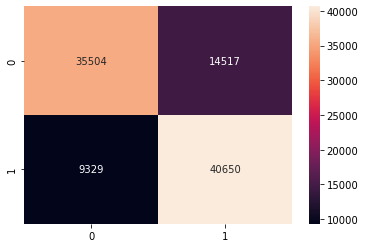

In [9]:
###### Training #######
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.pipeline import *
from sklearn import svm 
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier


def modele_base(model):
    model.fit(xtrain, ytrain)
    prediction=model.predict(xtest)
    print("classification rapport : \n", classification_report(ytest,prediction))
    plt.figure()
    N,train_score,val_score=learning_curve(model,xtrain,ytrain,train_sizes=np.linspace(0.1,1,5),cv=5)
    plt.plot(N,train_score.mean(axis=1),c='r',label='train')
    plt.plot(N,val_score.mean(axis=1),c='b',label='validation')
    plt.legend()
    plt.show()
    plt.figure()
    sns.heatmap(metrics.confusion_matrix(ytest,prediction),annot=True,fmt='g')
    plt.show()

MultinomialNB = make_pipeline(TfidfVectorizer(),MultinomialNB())
LogisticRegression = make_pipeline(TfidfVectorizer(),LogisticRegression())
LinearSVC=make_pipeline(TfidfVectorizer(),LinearSVC())
#RandomForestClassifier=make_pipeline(TfidfVectorizer(),RandomForestClassifier())
SGDClassifier=make_pipeline(TfidfVectorizer(),SGDClassifier())


list_model={
    "Naive_bayes":MultinomialNB,
    "LogisticRegression":LogisticRegression,
    "svm":LinearSVC,
    "SGDClassifier":SGDClassifier
    
    
}

for nom,value in list_model.items():
    print(nom)
    print("")
    modele_base(value)
    

In [10]:
#### optimisation ######
from sklearn.model_selection import GridSearchCV

print(LogisticRegression.get_params())

params={
 'logisticregression__solver':['newton-cg', 'lbfgs' 'liblinear', 'sag', 'saga'],
 'logisticregression__penalty':['l1', 'l2', 'elasticnet'],
 'logisticregression__multi_class':['auto', 'ovr', 'multinomial']
  
}

grid=GridSearchCV(LogisticRegression,params,cv=5)
grid.fit(xtrain,ytrain)
print("")
print("best score =>  {}".format(grid.best_score_))



{'memory': None, 'steps': [('tfidfvectorizer', TfidfVectorizer()), ('logisticregression', LogisticRegression())], 'verbose': False, 'tfidfvectorizer': TfidfVectorizer(), 'logisticregression': LogisticRegression(), 'tfidfvectorizer__analyzer': 'word', 'tfidfvectorizer__binary': False, 'tfidfvectorizer__decode_error': 'strict', 'tfidfvectorizer__dtype': <class 'numpy.float64'>, 'tfidfvectorizer__encoding': 'utf-8', 'tfidfvectorizer__input': 'content', 'tfidfvectorizer__lowercase': True, 'tfidfvectorizer__max_df': 1.0, 'tfidfvectorizer__max_features': None, 'tfidfvectorizer__min_df': 1, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__norm': 'l2', 'tfidfvectorizer__preprocessor': None, 'tfidfvectorizer__smooth_idf': True, 'tfidfvectorizer__stop_words': None, 'tfidfvectorizer__strip_accents': None, 'tfidfvectorizer__sublinear_tf': False, 'tfidfvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b', 'tfidfvectorizer__tokenizer': None, 'tfidfvectorizer__use_idf': True, 'tfidfvectorizer__vo

In [16]:
#####test#####
modelfinal=grid.best_estimator_
Example=["dont't fly @britishAirWays their cutomer service is horrendous","Excited to announce in steam payments on twitter check'it ou right here ",
        "I m the most valuabl person on the planet","This is really great news! I am so happy I can barely speak. He may have been a terrible presidential candidate and an even worse U.S. Senator, but he is a RINO, and I like him a lot!"]
for avis in Example:
    if(modelfinal.predict([avis])==0):
        print(avis, " => negative twitte")
    elif(modelfinal.predict([avis])==4):
        print(avis ,"  => positive twitte ")


dont't fly @britishAirWays their cutomer service is horrendous  => negative twitte
Excited to announce in steam payments on twitter check'it ou right here    => positive twitte 
I m the most valuabl person on the planet   => positive twitte 
This is really great news! I am so happy I can barely speak. He may have been a terrible presidential candidate and an even worse U.S. Senator, but he is a RINO, and I like him a lot!   => positive twitte 
